<h1>14. Introduction to Pandas</h1>
<h2>11/01/2023</h2>

<h2>14.0 Last Time...</h2>
<ul>
    <li>The <b>operator</b> package enables us to use a function called <b>attrgetter()</b> to grab attribute information from various classes.</li>
    <li>The <b>sorted()</b> function lets us sort data alphabetically or numerically as needed.</li>
    <li>NumPy's <b>meshgrid()</b> module lets us create a grid from lat/lon vectors.</li> 
</ul>

<h2>14.1 Why Pandas?</h2>

Python's standard library has some tools for working with CSV files, but Pandas makes life a whole lot easier! It handles missing data well and also allows for quick calculations and plotting (which we'll be talking about in a couple weeks). A Pandas <b>dataframe</b> is a lot like an Excel spreadsheet, but it's a lot faster and more flexible.

In [29]:
# Here's the new library we'll want for today:
import pandas as pd

Let's begin by using a tool we're familiar with that should work pretty well for this kind of data: dictionaries!

In [30]:
data = {"name":["john","bob","dan"], "age":[23,45,12],"salary":[23333,43555,90000],"title":["CFO","VP","CTO"]}
print(data["age"])

[23, 45, 12]


So far so good, but if we want to get the designation for the employee Sam, that can get a little complex. Pandas will make this endeavor easier and more intuitive.

Pandas features two data structures:
<ul>
    <li><b>Series:</b> 1-D labeled arrays that resemble dictionaries</li>
    <li><b>DataFrame:</b> (most common) 2-D like a spreadsheet</li>
</ul>

In [31]:
employees = pd.DataFrame(data)
print(employees)

   name  age  salary title
0  john   23   23333   CFO
1   bob   45   43555    VP
2   dan   12   90000   CTO


Remember from our object-oriented programming lectures: a DataFrame is just an object! We can list its attributes and methods using dir().

In [32]:
dir(employees)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '

In [33]:
print(employees)

   name  age  salary title
0  john   23   23333   CFO
1   bob   45   43555    VP
2   dan   12   90000   CTO


Just like Excel spreadsheets, dataframes are made up of <b>rows</b> and <b>columns</b>. Each column will have the same data type (all ints, all floats, all strings, etc.).

We can then set a column (or multiple columns) as an <b>index</b> that we can use as a shorthand.

In [34]:
employees.set_index("name",inplace=True)
# The inplace argument above means we're replacing
# our 'default' index with our new index.

print(employees)

      age  salary title
name                   
john   23   23333   CFO
bob    45   43555    VP
dan    12   90000   CTO


In [35]:
print(employees.index)
print(employees.columns)

Index(['john', 'bob', 'dan'], dtype='object', name='name')
Index(['age', 'salary', 'title'], dtype='object')


We can then use the <b>loc[]</b> function to access a group of rows and columns by a particular label.

In [8]:
employees.loc["john"]

age          23
salary    23333
title       CFO
Name: john, dtype: object

In [9]:
# Similarly, we can use 'iloc[]' to refer to a particular index.
employees.iloc[2]

age          12
salary    90000
title       CTO
Name: dan, dtype: object

It's also possible to create subsets of dataframes based on their values.

In [10]:
# Let's only look at employees older than 30.
print(employees[employees.age>30])

      age  salary title
name                   
bob    45   43555    VP


In [11]:
# Let's look at who's a VP and who isn't.
print(employees['title'] == 'VP')

name
john    False
bob      True
dan     False
Name: title, dtype: bool


In [12]:
# We can also easily set values or add new columns.
employees.loc['john','age'] = 22
print(employees)
# Change John's age to 22.


      age  salary title
name                   
john   22   23333   CFO
bob    45   43555    VP
dan    12   90000   CTO


In [13]:
# Let's say we now have information about what city
# everyone's in and we want to add that where we have it.
employees['city'] = 'montreal'
print(employees)

      age  salary title      city
name                             
john   22   23333   CFO  montreal
bob    45   43555    VP  montreal
dan    12   90000   CTO  montreal


In [14]:
# Whoops, Diane's moved to Toronto!
employees.loc['john','city'] = 'toronto'
print(employees)

      age  salary title      city
name                             
john   22   23333   CFO   toronto
bob    45   43555    VP  montreal
dan    12   90000   CTO  montreal


The <b>describe()</b> function is a helpful summary of statistics.

In [15]:
# employees.age.describe()
employees.salary.describe()
# WHAT

count        3.000000
mean     52296.000000
std      34182.247337
min      23333.000000
25%      33444.000000
50%      43555.000000
75%      66777.500000
max      90000.000000
Name: salary, dtype: float64

In [16]:
# We can also easily do mathematical operations.

employees.salary = employees.salary + 1000
print(employees)

      age  salary title      city
name                             
john   22   24333   CFO   toronto
bob    45   44555    VP  montreal
dan    12   91000   CTO  montreal


In [17]:
# Or use things like value counts!

employees.title.value_counts()

title
CFO    1
VP     1
CTO    1
Name: count, dtype: int64

In [18]:
# Pandas can also be used to create some useful date ranges!
pd.date_range('1/1/2021','1/12/2021')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12'],
              dtype='datetime64[ns]', freq='D')

<h2>14.2 Pandas Examples</h2>

You'll need to re-run these lines of code to clear out all the changes
we made above...

In [19]:
employees = pd.DataFrame(my_dict)
employees.set_index('name', inplace=True)

NameError: name 'my_dict' is not defined

<b>1. Promote Ashley to CEO.</b>

<b>2. Using methods you learned in this lecture, find the mean and standard deviation of salaries.</b>

<b>3. A year has passed! Increase everyone's ages by 1.</b>

<h2>14.3 Pandas With Atmospheric Data</h2>

Let's use a real-life example! This is information from Chris McCray at McGill: Daily weather data for Montreal from 1871-2019. Pandas has a <b>read_csv()</b> function that will come in handy here.

In [2]:
import pandas as pd

mtl_weather = pd.read_csv('http://www.cdmccray.com/python_tutorial/pandas/montreal_daily_weather.csv')

/var/folders/0x/8vc0k5b97mq8hxcghjr_nb300000gn/T/ipykernel_61695/2319455187.py:3: DtypeWarning: Columns (24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  mtl_weather = pd.read_csv('http://www.cdmccray.com/python_tutorial/pandas/montreal_daily_weather.csv')


In [3]:
print(mtl_weather.columns)

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag', 'Date', 'season'],
      dtype='object')


Let's set the index to the date of observation.

In [4]:
mtl_weather.set_index('Date/Time',inplace=True)

<b>Grouping</b> is a useful feature within Pandas that lets us do the following:
<ul>
    <li>Split the data into groups based on some criteria.</li>
    <li>Apply a function to each group independently.</li>
    <li>Combine the results into a data structure.</li>
</ul>

In [5]:
# As an example, let's count how much temperature data is available for each year.

a = mtl_weather.groupby('Year').count()['Max Temp (°C)']
print(a)

Year
1871    184
1872    366
1873    334
1874    365
1875    365
       ... 
2015    358
2016    360
2017    351
2018    357
2019     74
Name: Max Temp (°C), Length: 149, dtype: int64


<Axes: xlabel='Year'>

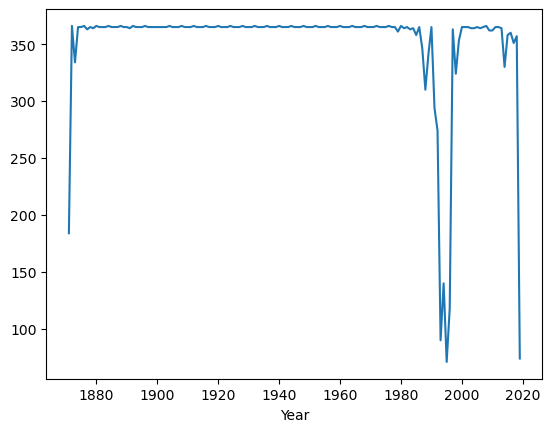

In [6]:
a.plot()

Okay, so there's a lot of missing data in the 90s! We can actually remove all rows with missing data by using <b>dropna()</b>. Since there's probably a lot of data missing, let's specify that we're only removing the rows that have missing temperature data.

In [7]:
print(mtl_weather.shape)
mtl_weather.dropna(subset=['Max Temp (°C)'], inplace=True)
print(mtl_weather.shape)

(54421, 28)
(52456, 28)


We can also use <b>groupby()</b> to calculate the average temperature for each year!

<Axes: xlabel='Year'>

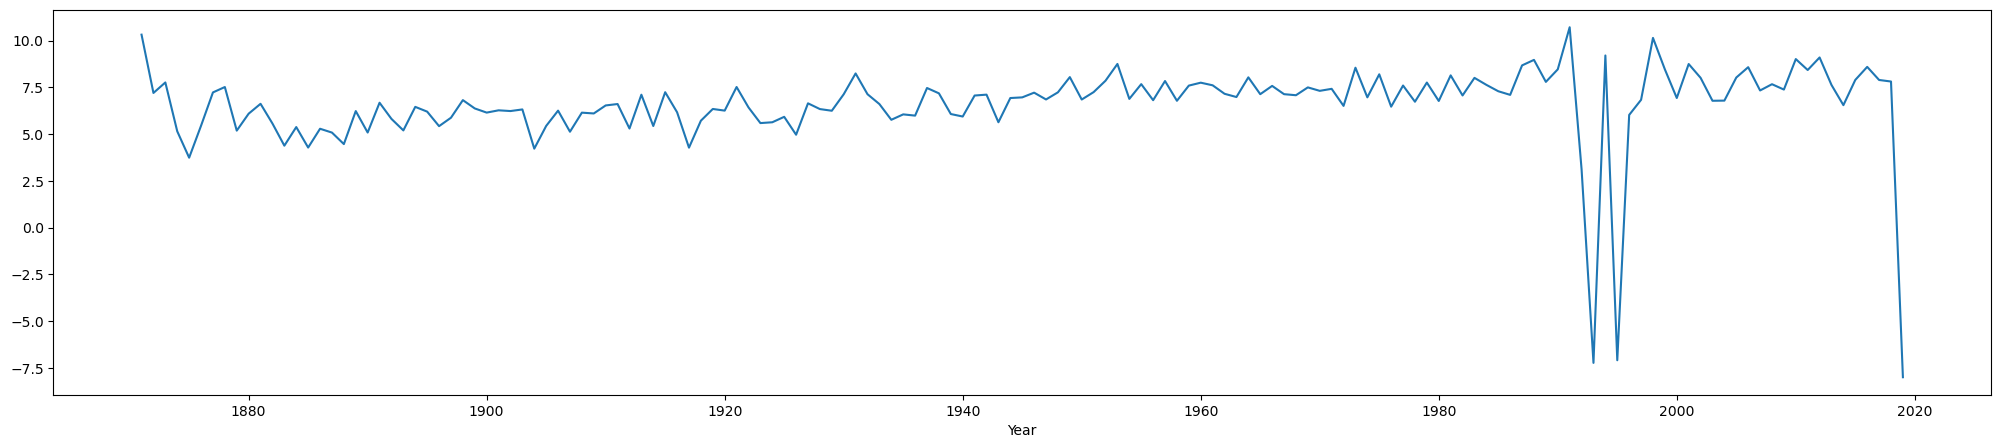

In [10]:
mtl_weather.groupby('Year')['Mean Temp (°C)'].mean().plot(figsize=(25,5))

Okay, well, there's obviously something suspicious going on here - it's not that cold, even in Montreal! Note that these are years where a lot of data is missing - it looks like most of that data's from the warm season.

How would you handle this kind of problem?

<Axes: xlabel='Year'>

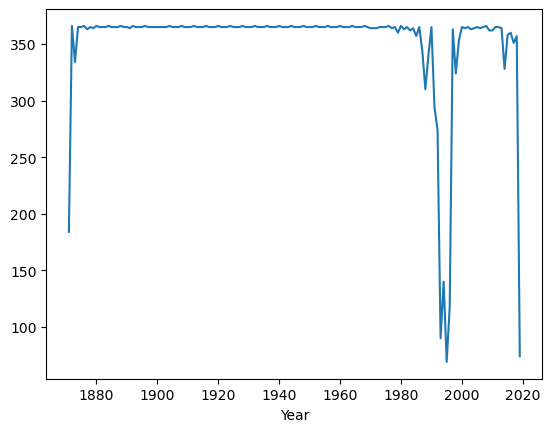

In [12]:
yearlycounts = mtl_weather.groupby('Year').count()['Mean Temp (°C)']
yearlycounts.plot()

Let's set our threshold to about 350 days.

Index([1872, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       ...
       2008, 2009, 2010, 2011, 2012, 2013, 2015, 2016, 2017, 2018],
      dtype='int64', name='Year', length=135)


<Axes: xlabel='Year'>

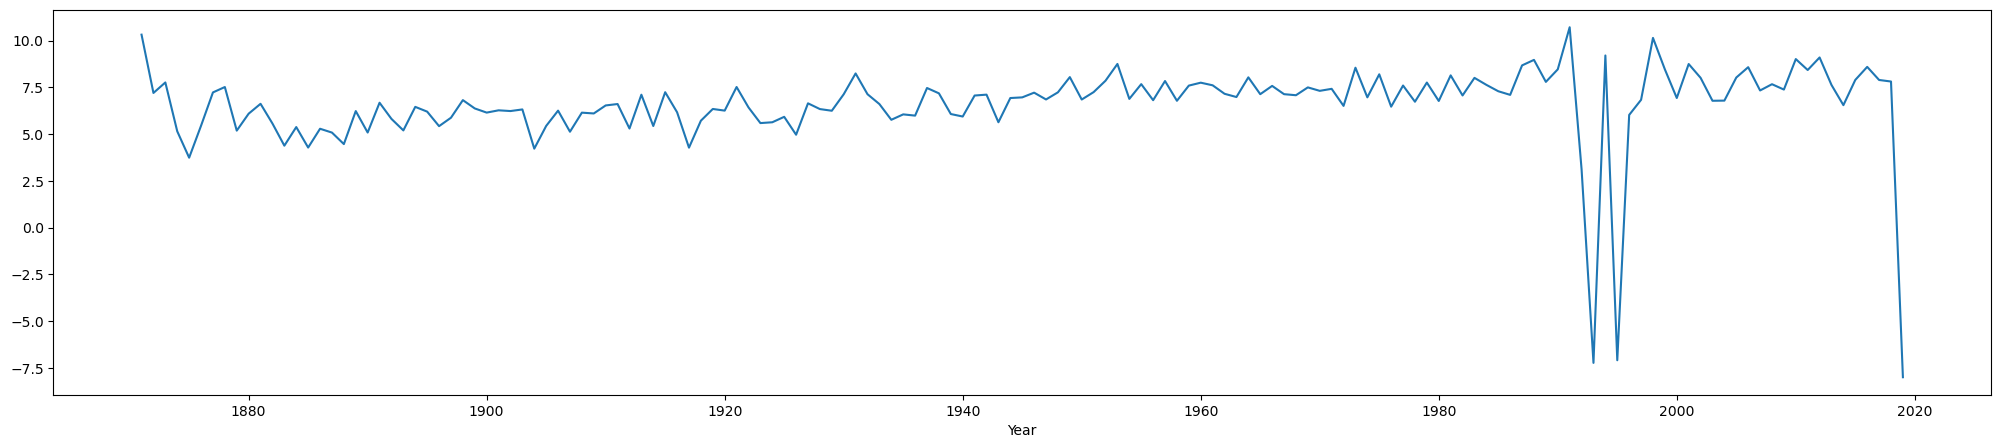

In [15]:
goodyears = yearlycounts[yearlycounts>350].index
print(goodyears)

We can now subset the dataframe to only include data from our good years using the <b>isin()</b> function.

<Axes: xlabel='Year'>

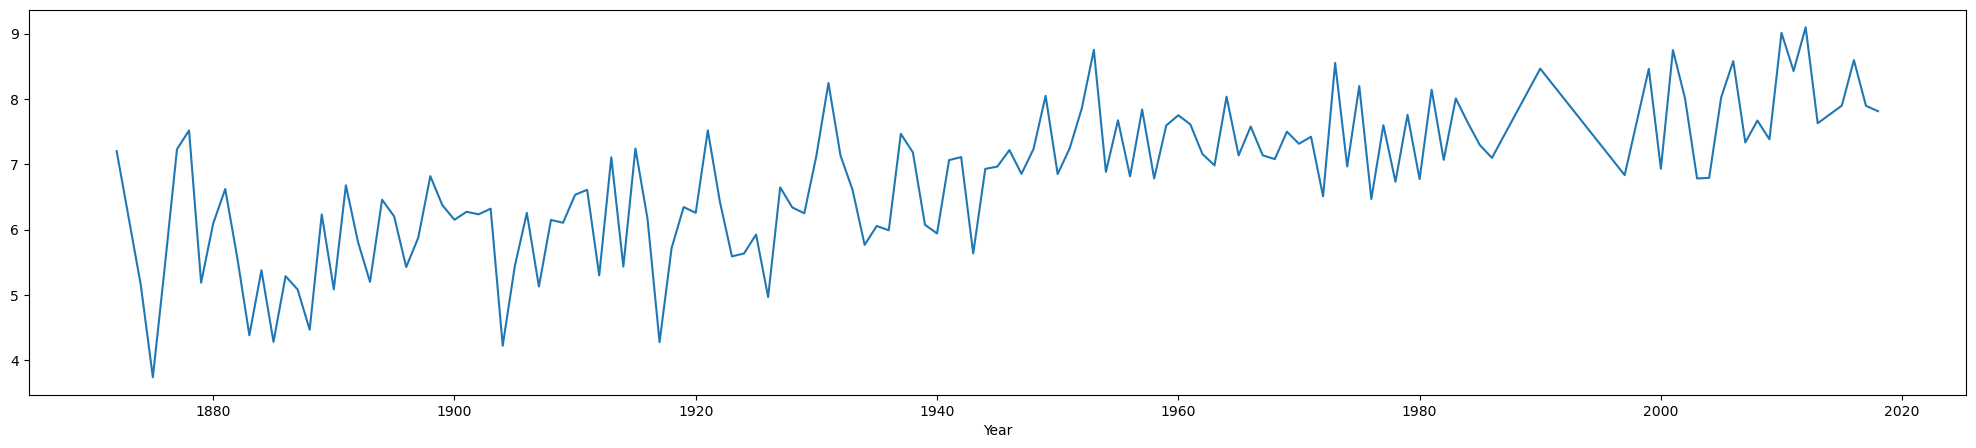

In [17]:
mtl_weather = mtl_weather[mtl_weather.Year.isin(goodyears)]
mtl_weather.groupby('Year')['Mean Temp (°C)'].mean().plot(figsize=(25,5))

It's also very easy to get extreme values from the dataset. The <b>nsmallest()</b> function will list the smallest values, and the <b>nlargest()</b> function will list the largest.

In [18]:
print(mtl_weather['Min Temp (°C)'].nsmallest())

Date/Time
1933-12-29   -33.9
1981-01-04   -33.5
1943-02-15   -33.3
1914-01-13   -32.8
1914-02-11   -32.8
Name: Min Temp (°C), dtype: float64


In [19]:
mtl_weather.describe()

Year         Month           Day  Data Quality  Max Temp (°C)  \
count  49226.000000  49226.000000  49226.000000           0.0   49226.000000   
mean    1941.422480      6.522468     15.725287           NaN      10.807128   
std       41.283202      3.448537      8.799889           NaN      12.444379   
min     1872.000000      1.000000      1.000000           NaN     -28.900000   
25%     1906.000000      4.000000      8.000000           NaN       1.100000   
50%     1940.000000      7.000000     16.000000           NaN      11.700000   
75%     1974.000000     10.000000     23.000000           NaN      21.700000   
max     2018.000000     12.000000     31.000000           NaN      36.600000   

       Min Temp (°C)  Mean Temp (°C)  Heat Deg Days (°C)  Cool Deg Days (°C)  \
count   49215.000000    49215.000000        49215.000000        49215.000000   
mean        2.680293        6.753986           12.040049            0.794034   
std        11.722607       11.986670           11.006062            1.850957   
min       -33.900000      -31.400000            0.000000            0.000000   
25%        -6.100000       -2.500000            0.700000            0.000000   
50%         3.800000        7.700000           10.300000            0.000000   
75%        12.800000       17.300000           20.500000            0.000000   
max        26.100000       30.300000           49.400000           12.300000   

       Total Rain (mm)  Total Snow (cm)  Total Precip (mm)  Snow on Grnd (cm)  \
count     41958.000000     41949.000000       48913.000000       12384.000000   
mean          2.111869         0.736919           2.901108          10.154797   
std           5.781769         2.854098           6.503921          19.577769   
min           0.000000         0.000000           0.000000           0.000000   
25%           0.000000         0.000000           0.000000           0.000000   
50%           0.000000         0.000000           0.000000           0.000000   
75%           0.800000         0.000000           2.500000          10.000000   
max          90.400000        46.500000          94.700000         145.000000   

       Dir of Max Gust (10s deg)        season  
count                1992.000000  49226.000000  
mean                   20.743474   1941.841385  
std                    11.753323     41.286312  
min                     1.000000   1872.000000  
25%                    14.000000   1907.000000  
50%                    21.500000   1940.000000  
75%                    33.000000   1974.000000  
max                    36.000000   2019.000000

<h2>14.4 Take-Home Points</h2>
<ul>
    <li><b>Pandas</b> is a useful way of working with CSV data!</li>
    <li>A <b>dataframe</b> is an object that contains rows and columns, much like an Excel spreadsheet.</li>
    <li><b>loc()</b> will let you identify individual rows, columns, or values.</li>
    <li><b>describe()</b> summarizes statistics for a specified section of a dataframe.</li>
    <li><b>read_csv()</b> will read in a CSV file specified by a file location.</li>
    <li><b>groupby()</b> carries out specific operations on groupings within a dataframe.</li>
</ul>